# ASSIGNMENT

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv("./Datasets/student_data.csv")

In [120]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [122]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [16]:
print(df.shape)

(395, 33)


In [18]:
data = ["school", "sex", "age", "address", "Medu", "Fedu", "studytime", "activities", "romantic", "failures", "internet", "paid", "G1", "G2", "G3"]

student = df[data]
student.head()

,school,sex,age,address,Medu,Fedu,studytime,activities,romantic,failures,internet,paid,G1,G2,G3
0,GP,F,18,U,4,4,2,no,no,0,no,no,5,6,6
1,GP,F,17,U,1,1,2,no,no,0,yes,no,5,5,6
2,GP,F,15,U,1,1,2,no,no,3,yes,yes,7,8,10
3,GP,F,15,U,4,2,3,yes,yes,0,yes,yes,15,14,15
4,GP,F,16,U,3,3,2,no,no,0,no,yes,6,10,10


In [22]:
for col in student.columns:
    print(f"{col}: {student[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
studytime: [2 3 1 4]
activities: ['no' 'yes']
romantic: ['no' 'yes']
failures: [0 3 2 1]
internet: ['no' 'yes']
paid: ['no' 'yes']
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


In [26]:
student.describe()

,age,Medu,Fedu,studytime,failures,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,2.035443,0.334177,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.839240,0.743651,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,2.000000,0.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,0.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,19.000000,19.000000,20.000000


In [171]:
student.describe(include='object')

,school,sex,address,activities,romantic,internet,paid
count,395,395,395,395,395,395,395
unique,2,2,2,2,2,2,2
top,GP,F,U,yes,no,yes,no
freq,349,208,307,201,263,329,214


In [173]:
numeric_cols = student.select_dtypes(include=[np.number])
numeric_cols.corr()

,age,Medu,Fedu,studytime,failures,G1,G2,G3
age,1.000000,-0.163658,-0.163438,-0.004140,0.243665,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,0.064944,-0.236680,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.009175,-0.250408,0.190270,0.164893,0.152457
studytime,-0.004140,0.064944,-0.009175,1.000000,-0.173563,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,-0.173563,1.000000,-0.354718,-0.355896,-0.360415
G1,-0.064081,0.205341,0.190270,0.160612,-0.354718,1.000000,0.852118,0.801468
G2,-0.143474,0.215527,0.164893,0.135880,-0.355896,0.852118,1.000000,0.904868
G3,-0.161579,0.217147,0.152457,0.097820,-0.360415,0.801468,0.904868,1.000000


## Plotting

#### Histogram

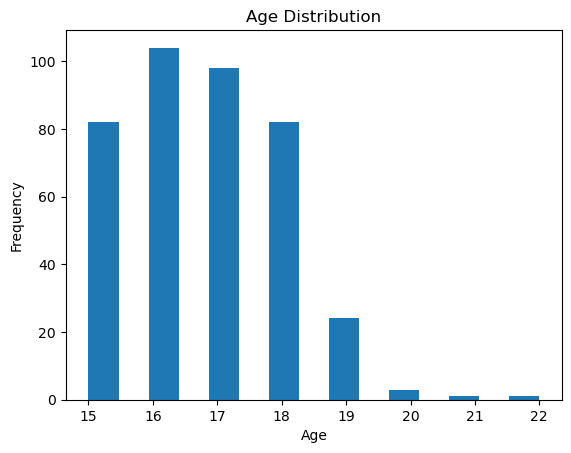

In [175]:
student["age"].plot(kind='hist', bins=15)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

#### Box Plot

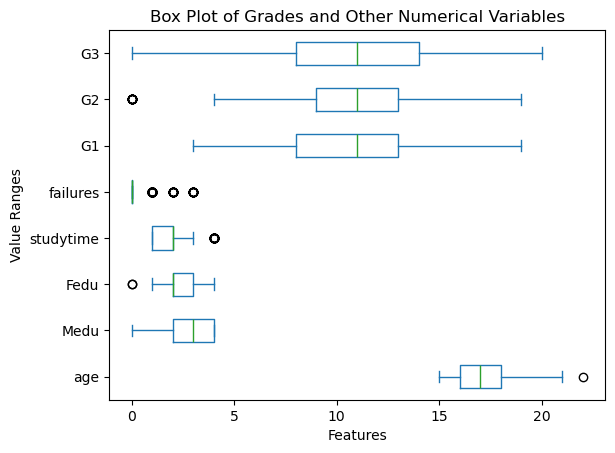

In [135]:
student.select_dtypes(include=['number']).plot(kind="box", vert=False)
plt.title("Box Plot of Grades and Other Numerical Variables")
plt.xlabel("Features")
plt.ylabel("Value Ranges")
plt.show()

#### Scatter Plot: Correlation

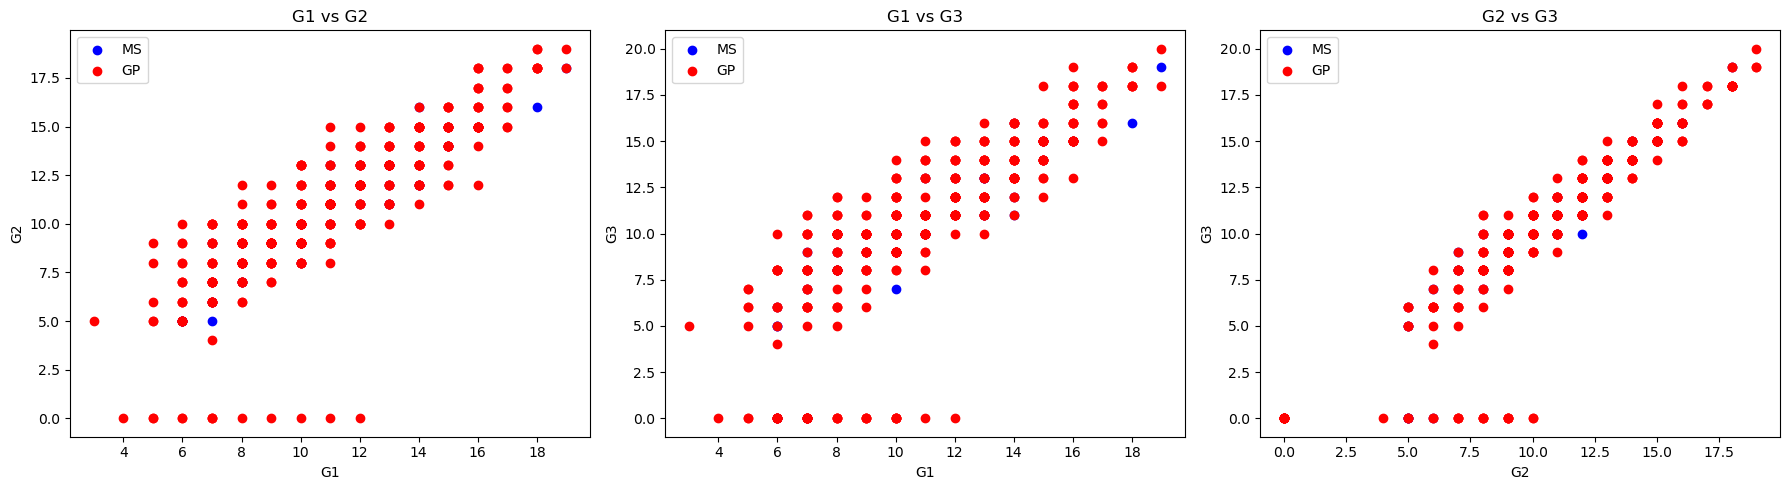

In [133]:
ms_grades = student.loc[student["school"] == "MS", ["G1", "G2", "G3"]]
gp_grades = student.loc[student["school"] == "GP", ["G1", "G2", "G3"]]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(ms_grades["G1"], ms_grades["G2"], color='blue', label="MS")
axs[0].scatter(gp_grades["G1"], gp_grades["G2"], color='red', label="GP")
axs[0].set_title("G1 vs G2")
axs[0].set_xlabel("G1")
axs[0].set_ylabel("G2")
axs[0].legend()

axs[1].scatter(ms_grades["G1"], ms_grades["G3"], color='blue', label="MS")
axs[1].scatter(gp_grades["G1"], gp_grades["G3"], color='red', label="GP")
axs[1].set_title("G1 vs G3")
axs[1].set_xlabel("G1")
axs[1].set_ylabel("G3")
axs[1].legend()

axs[2].scatter(ms_grades["G2"], ms_grades["G3"], color='blue', label="MS")
axs[2].scatter(gp_grades["G2"], gp_grades["G3"], color='red', label="GP")
axs[2].set_title("G2 vs G3")
axs[2].set_xlabel("G2")
axs[2].set_ylabel("G3")
axs[2].legend()

plt.tight_layout()
plt.show()
